# import libraries

In [125]:
# data analysis stack
import numpy as np
import pandas as pd

#visualizatoion
import seaborn as sns
sns.set_style('whitegrid')

# text-related stack
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

#directory
import os

#save model
import pickle

# Functions

In [126]:
def lyrics_corpus(path,a,b):
    lyrics = []
    for file_name in os.listdir(path)[a:b]:
        if file_name.endswith('.txt'):
            with open(path+'/' + file_name,'r') as lyric_file:
                lyrics.append(lyric_file.read())
    return lyrics

#define metrics function of Rakib
def metrics(yt,yp,estimator):
    """
    This function returns a dataframe with the model evaluation metrics,
    and a heatmap of the confusion matrix
    """
    sns.heatmap(data=confusion_matrix(yt,yp),cmap='crest',annot=True)
    
    accuracy = round(accuracy_score(yt,yp),6)
    precision = round(precision_score(yt,yp),6)
    recall = round(recall_score(yt,yp),6)
    balanced_accuracy = round(balanced_accuracy_score(yt, yp),6)
    
    df_metric = pd.DataFrame({estimator: [accuracy,precision,recall,balanced_accuracy]},
                            index = ['accuracy','precision','recall','balanced_accuracy'])
    return df_metric

# Create corpus

I decided here to create a single TRAIN and TEST corpus manually. This two corpus will go to the pipeline as corpus_train and corpus_test. That's fine. 
But there's is of course a way to define OUT OF corpus a DATAFRAME which is put into the pipeline as X_train and X_test and so on:
- Step 1:
    - Read all the files of the artists into two corpus
- Step 2: 
    - Create Labels
- Step 3:
    - Add corpus 1 + corpus 2 and Labels 1 + Labels to a belonging DATAFRAME --> receive a df with index and just 1 column (which includes 1 whole song per row)
- Step 4:
    - Do a Train-Test-Split--> X_train, X_test, y_train, y_test
- Step 5:
    - Build the Pipeline
- Step 6:
    - Fit pipeline with X_train and y_train
- Step 7:
    - score pipeline with X_test and y_test

## Train corpus

In [127]:
#Roxette corpus
path='./roxette'
roxette_lyrics = lyrics_corpus(path,0,80)
len(roxette_lyrics)

80

In [128]:
#Backstreet Boys corpus
path='./backstreet boys'
bboys_lyrics = lyrics_corpus(path,0,80)
len(bboys_lyrics)

80

In [129]:
#Total Corpus with lapel

corpus_train=roxette_lyrics+bboys_lyrics

l1,l2=len(roxette_lyrics),len(bboys_lyrics)
labels_train=[0 for i in range(l1)]+[1 for i in range(l2)] #0 - Roxette, 1 - BBoys

In [130]:
len(corpus_train), len(labels_train)

(160, 160)

## Test corpus

In [131]:
#Roxette test_corpus
path='./roxette_test_data'
roxette_test_lyrics = lyrics_corpus(path,0,20)
len(roxette_test_lyrics)

6

In [132]:
#BBoys test_corpus
path='./backstreet boys_test_data'
bboys_test_lyrics = lyrics_corpus(path,0,20)
len(bboys_test_lyrics)

13

In [133]:
#Total Test_Corpus with label

corpus_test=roxette_test_lyrics+bboys_test_lyrics

l1,l2=len(roxette_test_lyrics),len(bboys_test_lyrics)
labels_test=[0 for i in range(l1)]+[1 for i in range(l2)] # 0 - Roxette, 1 - BBoys

In [134]:
len(corpus_test), len(labels_test)

(19, 19)

In [ ]:
#word.encode('ascii','ignore') 

# Pipeline with Bow and Scikit-Learn

## Logistic Regression

In [135]:
reg_pattern=r'(?u)\b\w\w+\b'

In [136]:
pipe_logReg = make_pipeline(TfidfVectorizer(token_pattern = reg_pattern,stop_words=text.ENGLISH_STOP_WORDS, 
                            lowercase = True,analyzer = 'word'), 
                            LogisticRegression(class_weight='all', max_iter=100, n_jobs=-1))

In [137]:
pipe_logReg.fit(corpus_train,labels_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                     

In [138]:
pipe_logReg.score(corpus_train,labels_train)

0.9875

In [139]:
pred_logReg=pipe_logReg.predict(corpus_test)
len(pred_logReg)

19

In [140]:
pipe_logReg.score(corpus_test,labels_test)

0.47368421052631576

In [141]:
#labels_test, pred_logReg

,logReg
accuracy,0.473684
precision,0.714286
recall,0.384615
balanced_accuracy,0.525641


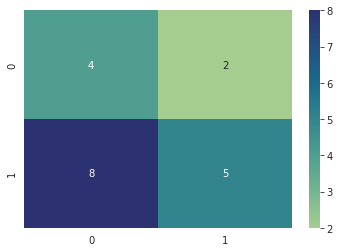

In [142]:
# logistic regression model evaluation metrics
metrics_logReg=metrics(labels_test,pred_logReg,'logReg')
metrics_logReg

## RandomForest

In [143]:
pipe_rf = make_pipeline(TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS, token_pattern = reg_pattern), 
                            RandomForestClassifier(max_depth=5, n_estimators=100))

In [144]:
pipe_rf.fit(corpus_train,labels_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                     

In [145]:
pipe_rf.score(corpus_train,labels_train)

0.9875

In [146]:
pred_rf=pipe_rf.predict(corpus_test)

,rf
accuracy,0.526316
precision,0.750000
recall,0.461538
balanced_accuracy,0.564103


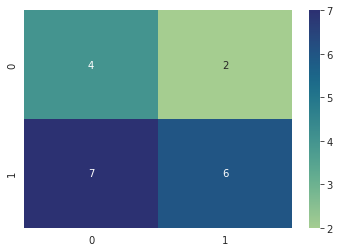

In [147]:
# random forest model evaluation metrics
metrics_rf=metrics(labels_test,pred_rf,'rf')
metrics_rf

## Naive Bayes

In [148]:
pipe_NB = make_pipeline(TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS, token_pattern = reg_pattern), 
                            MultinomialNB())

In [149]:
pipe_NB.fit(corpus_train,labels_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                     

In [150]:
pipe_NB.score(corpus_train,labels_train)

0.98125

In [151]:
pred_NB=pipe_NB.predict(corpus_test)
pred_NB

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

,NB
accuracy,0.631579
precision,0.750000
recall,0.692308
balanced_accuracy,0.596154


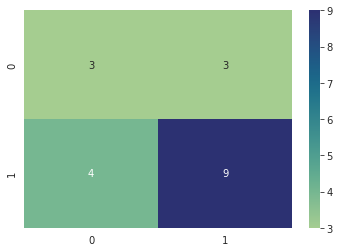

In [152]:
# logistic regression model evaluation metrics
metrics_NB=metrics(labels_test,pred_NB,'NB')
metrics_NB

### save NB-Model in a file

In [153]:
with open('04_Project_NB_model', 'wb') as my_file:
	pickle.dump(pipe_NB, my_file)

## Conclusion without Balancing

In [154]:
metrics_total=pd.concat([metrics_logReg,metrics_rf,metrics_NB],axis=1)
metrics_total

,logReg,rf,NB
accuracy,0.473684,0.526316,0.631579
precision,0.714286,0.750000,0.750000
recall,0.384615,0.461538,0.692308
balanced_accuracy,0.525641,0.564103,0.596154


In [57]:
from collections import Counter
Counter(labels_train) # not really imbalanced...

Counter({0: 70, 1: 70})

Difference between this Notebook and Bag_of_words NB is that here test data is outside the pipeline and outside the tfid vectorizer! In Bag_of_words NB I do the train-test-split AFTER Bag-of-words Vectorizing!

# Naive Bayse with Class Balancing

In [88]:
#Remove Oversampling
from imblearn.over_sampling import SMOTE
#Remove Undersampling
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline as imbpipeline

In [89]:
pipe_NB_new = imbpipeline(steps=[['tfid',TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS, token_pattern = reg_pattern)],
                                ['smote',SMOTE(sampling_strategy={1: 20_000}, random_state=10)],
                                 ['tomek', TomekLinks(sampling_strategy='all')],
                                ['NB',MultinomialNB()]])

In [90]:
pipe_NB_new.fit(corpus_train,labels_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                       'anything

In [91]:
pipe_NB_new.score(corpus_train,labels_train)

0.7428571428571429

In [92]:
pred_NB_new=pipe_NB_new.predict(corpus_test)

,NB_new
accuracy,0.5
precision,0.5
recall,1.0
balanced_accuracy,0.5


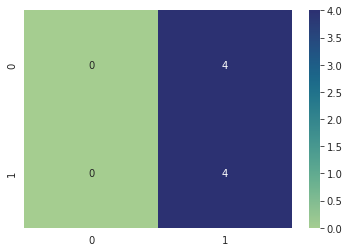

In [93]:
metrics_NB_new=metrics(labels_test,pred_NB_new,'NB_new')
metrics_NB_new